In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Reading in the excel sheet
path_two="Resources\educ7_week22.xlsx"
wk_last=pd.read_excel(path_two)
wk_last

,"Education Table 7. Impact of Coronavirus Pandemic on Post-Secondary Educational Plans, by Reasons for Changes : United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Source: U.S. Census Bureau Household Pulse Sur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: These data are experimental. Users shoul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total Population 18 Years and Older in Househo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Select characteristics,Total*,Plans to take classes this fall have not changed,All plans to take classes this fall have been ...,Classes will be in different formats in the fall,Fewer classes will be taken this fall,More classes will be taken this fall,Classes will be taken from a different institu...,Classes will be taken for a different kind of ...,Did not report
4,Total*,59754202,15422123,19333588,22733252,7084107,1218193,1702681,2415572,4004069
5,Had coronavirus or had concerns about cont...,16199570,1468075,8683247,7002517,2986934,447753,857801,819267,-
6,Caring for someone with coronavirus,1226098,133453,686905,502730,421737,121002,129578,195660,-
7,Caring for others whose care arrangements ...,3370376,253950,1998002,1214085,809012,162683,263106,321358,-
8,Institution changed content or format of c...,20745337,3162861,4816789,15826987,4044303,535895,934453,911511,-
9,Changes to financial aid,6454930,671072,3465359,2738489,1482215,335923,379308,478233,-


In [3]:
# Dropping null values
last_wk_clean = wk_last.dropna(how='any')

# Resetting the index
header_row_two=0
last_wk_clean.columns = last_wk_clean.iloc[header_row_two]
last_wk_clean=last_wk_clean.reset_index(drop=True)

# Dropping repeated values
last_wk_clean=last_wk_clean.drop([0])
last_wk_clean

3,Select characteristics,Total*,Plans to take classes this fall have not changed,All plans to take classes this fall have been canceled,Classes will be in different formats in the fall,Fewer classes will be taken this fall,More classes will be taken this fall,Classes will be taken from a different institution,Classes will be taken for a different kind of certificate or degree,Did not report
1,Total*,59754202,15422123,19333588,22733252,7084107,1218193,1702681,2415572,4004069
2,Had coronavirus or had concerns about cont...,16199570,1468075,8683247,7002517,2986934,447753,857801,819267,-
3,Caring for someone with coronavirus,1226098,133453,686905,502730,421737,121002,129578,195660,-
4,Caring for others whose care arrangements ...,3370376,253950,1998002,1214085,809012,162683,263106,321358,-
5,Institution changed content or format of c...,20745337,3162861,4816789,15826987,4044303,535895,934453,911511,-
6,Changes to financial aid,6454930,671072,3465359,2738489,1482215,335923,379308,478233,-
7,Changes to campus life,6510297,1063415,1843259,4488261,1657401,356461,580044,439072,-
8,Uncertainty about how classes/program migh...,10767876,890345,5520566,5151523,2822909,251214,734768,777203,-
9,Not able to pay for classes/educational ex...,13499337,828858,9243848,3945370,2357279,338901,727153,1060198,-
10,Some other reason related to the pandemic,3723397,331468,2082056,1361177,807429,154380,330371,484488,-


In [4]:
# Creating variables for health impacts on education 
hc_v=last_wk_clean.loc[2][1]
cf_v=last_wk_clean.loc[3][1]
cfa_v=last_wk_clean.loc[4][1]

# Creating a dataframe for health impacts on education 
ch_df=pd.DataFrame({"Health Impacts":["Had COVID/Concerns of the Pandemic","Caring for Someone with COVID","Caring for Others"],
                 "Total Number of Students":[hc_v,cf_v,cfa_v]
                })
ch_df

,Health Impacts,Total Number of Students
0,Had COVID/Concerns of the Pandemic,16199570
1,Caring for Someone with COVID,1226098
2,Caring for Others,3370376


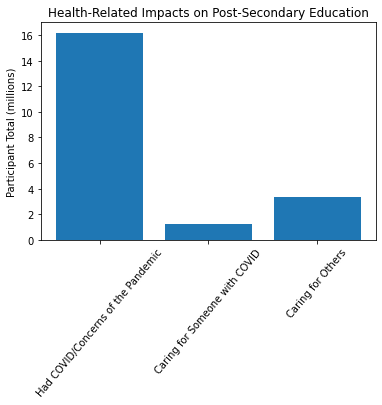

In [5]:
# Plotting the data for health impacts
ch_x=ch_df["Health Impacts"]
ch_y=ch_df["Total Number of Students"]/1000000
plt.bar(ch_x,ch_y)
plt.title('Health-Related Impacts on Post-Secondary Education')
plt.ylabel('Participant Total (millions)')
plt.xticks(rotation=50)
plt.savefig("health1.png")

In [6]:
# Creating variables for important education data
cancel_v=last_wk_clean.loc[1][3]
clife_v=last_wk_clean.loc[7][1]
exp_v=last_wk_clean.loc[9][1]

# Creating a dataframe for educational impacts
ce_df=pd.DataFrame({"Select Characteristics":["Cancelled College Plans","Changes in Campus Life","Financial Instability"],
                 "Total Number of Students":[cancel_v,clife_v,exp_v]
                })
ce_df

,Select Characteristics,Total Number of Students
0,Cancelled College Plans,19333588
1,Changes in Campus Life,6510297
2,Financial Instability,13499337


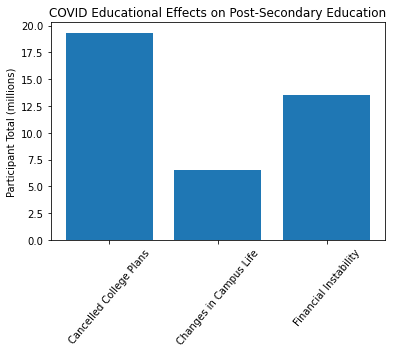

In [7]:
# Plotting the data for educational impacts
ce_x=ce_df["Select Characteristics"]
ce_y=ce_df["Total Number of Students"]/1000000
plt.bar(ce_x,ce_y)
plt.title('COVID Educational Effects on Post-Secondary Education')
plt.ylabel('Participant Total (millions)')
plt.xticks(rotation=50)
plt.savefig("educ.png")

In [8]:
# Reading in the excel sheet
housing_path="Resources\housing2b_week22.xlsx"
housing_df=pd.read_excel(housing_path)

housing_df

,"Housing Table 2b. Confidence in Ability to Make Next Month’s Payment for Renter-Occupied Housing Units, by Select Characteristics: United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Source: U.S. Census Bureau Household Pulse Sur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: These data are experimental. Users shoul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total Population 18 Years and Older in Renter-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Select characteristics,Total*,Occupied without rent,Confidence to pay next month’s rent,Confidence to pay next month’s rent,Confidence to pay next month’s rent,Confidence to pay next month’s rent,Confidence to pay next month’s rent,Confidence to pay next month’s rent,Did not report to tenure
4,NaN,NaN,NaN,No confidence,Slight confidence,Moderate confidence,High confidence,Payment is/will be deferred,Did not report,NaN
...,...,...,...,...,...,...,...,...,...,...
69,Money saved from deferred or forgiven paym...,2647214,159280,426812,383546,804584,836653,24974,11365,1163948
70,Supplemental Nutrition Assistance Program ...,6927219,576976,1549799,1681919,1523233,1406396,142439,46457,1766127
71,Did not report,1031567,124994,116286,119756,246308,291882,29462,102878,38238113
72,*Total includes only individuals who reported ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Dropping null values
h_clean =housing_df.drop([0,1,2,5,7,13,16,22,27,33,41,44,48,52,62,72,72,73])

# Resetting the index
header_row_h=0
h_clean.columns = h_clean.iloc[header_row_h]
h_clean_i= h_clean.reset_index(drop=True)
h_clean_i

# Dropping repeated values
h_df=h_clean_i.drop([0])
h_df

3,Select characteristics,Total*,Occupied without rent,Confidence to pay next month’s rent,Confidence to pay next month’s rent,Confidence to pay next month’s rent,Confidence to pay next month’s rent,Confidence to pay next month’s rent,Confidence to pay next month’s rent,Did not report to tenure
1,NaN,NaN,NaN,No confidence,Slight confidence,Moderate confidence,High confidence,Payment is/will be deferred,Did not report,NaN
2,Total,54204591,3263225,7029867,8613657,11836877,22367273,709156,384535,65959306
3,18 - 24,5960317,334714,424620,980507,1481462,2661956,5400,71659,11744032
4,25 - 39,21382202,942241,2653543,3324087,4607035,9309230,385753,160314,18207195
5,40 - 54,14067495,840750,2731761,2736094,2722105,4747300,181444,108041,14490459
6,55 - 64,6901707,480939,894739,1085303,1819493,2500666,95851,24715,9876898
7,65 and above,5892870,664580,325205,487667,1206783,3148121,40708,19805,11640722
8,Male,25050047,1741559,3108362,3643694,5124721,10784210,403712,243788,32921390
9,Female,29154544,1521666,3921505,4969963,6712157,11583063,305444,140747,33037916
10,Hispanic or Latino (may be of any race),12043312,719743,2185396,2746024,2980178,3179336,110428,122209,13909339


In [10]:
# Creating variables for each age group in order to plot them 
h_ageone=h_df.loc[3][3]
h_agetwo=h_df.loc[4][3]
h_agethree=h_df.loc[5][3]

# Creating a dataframe with age group variables
h_age_df=pd.DataFrame({"Age Groups":["18-24","25-39","40-54"],
                 "Participants unable to afford housing":[h_ageone,h_agetwo,h_agethree]
                })
h_age_df

,Age Groups,Participants unable to afford housing
0,18-24,424620
1,25-39,2653543
2,40-54,2731761


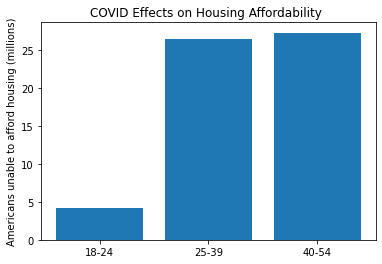

In [11]:
# Plotting the age group data
h_x=h_age_df["Age Groups"]
h_y=h_age_df["Participants unable to afford housing"]/100000
plt.bar(h_x,h_y)
plt.title('COVID Effects on Housing Affordability ')
plt.ylabel('Americans unable to afford housing (millions)')
# plt.xlabel("Participant's Age Group")
plt.savefig("housing_age.png")

In [12]:
# Creating variables for the gender breakdown
h_male=h_df.loc[8][3]
h_female=h_df.loc[9][3]

# Creating a dataframe for gender breakdown
h_gender_df=pd.DataFrame({"Gender":["Male","Female"],
                 "Participants unable to afford housing":[h_male,h_female]
                })
h_gender_df

,Gender,Participants unable to afford housing
0,Male,3108362
1,Female,3921505


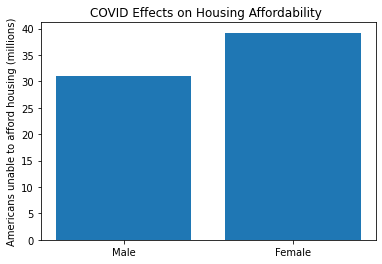

In [13]:
# Plotting the gender breakdown
gh_x=h_gender_df["Gender"]
gh_y=h_gender_df["Participants unable to afford housing"]/100000
plt.bar(gh_x,gh_y)
plt.title('COVID Effects on Housing Affordability ')
plt.ylabel('Americans unable to afford housing (millions)')
# plt.xlabel('Participants Gender Breakdown')
plt.savefig("housing_gender.png")

In [14]:
# Reading in the excel sheet
employment_path="Resources\employ1_week22.xlsx"
employment_data=pd.read_excel(employment_path)
employment_data

,"Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Source: U.S. Census Bureau Household Pulse Sur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: These data are experimental. Users shoul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total Population 18 Years and Older,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Select characteristics,Total,Experienced loss of employment income since Ma...,Experienced loss of employment income since Ma...,Experienced loss of employment income since Ma...,Expected loss of employment income in next 4-w...,Expected loss of employment income in next 4-w...,Expected loss of employment income in next 4-w...
4,NaN,NaN,Yes,No,Did not report,Yes,No,Did not report
...,...,...,...,...,...,...,...,...
61,Money saved from deferred or forgiven paym...,9158212,6129382,2954827,74003,3805870,5340538,11804
62,Supplemental Nutrition Assistance Program ...,12652208,8868370,3696095,87743,6078789,6502773,70647
63,Did not report,41789671,18350104,19814410,3625157,10850979,27060635,3878057
64,* Totals may not sum to 100% as the question a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Dropping null values
emp_clean =employment_data.drop([0,1,2,5,7,13,16,22,27,33,40,41,44,54,64,65])
emp_clean

# Resetting the index
header_row_e=0
emp_clean.columns = emp_clean.iloc[header_row_e]
emp_clean_i= emp_clean.reset_index(drop=True)
emp_clean_i

# Dropping repeated values
e_df=emp_clean_i.drop([0])
e_df.head(10)

3,Select characteristics,Total,"Experienced loss of employment income since March 13, 2020 (for self or household member)","Experienced loss of employment income since March 13, 2020 (for self or household member)","Experienced loss of employment income since March 13, 2020 (for self or household member)",Expected loss of employment income in next 4-weeks (for self or household member),Expected loss of employment income in next 4-weeks (for self or household member),Expected loss of employment income in next 4-weeks (for self or household member)
1,NaN,NaN,Yes,No,Did not report,Yes,No,Did not report
2,Total,249170916,118328627,126781353,4060937,66073020,178617642,4480254
3,18 - 24,24737120,13131718,9264652,2340750,5898204,16467212,2371705
4,25 - 39,65389093,35217255,29731983,439855,18769980,46127041,492072
5,40 - 54,62184465,33176792,28554331,453343,19941774,41757097,485595
6,55 - 64,42895233,21190404,21499181,205647,12604063,29921611,369559
7,65 and above,53965005,15612458,37731206,621342,8858999,44344681,761325
8,Male,120531610,57080210,61408292,2043107,33089004,85215996,2226610
9,Female,128639306,61248417,65373060,2017829,32984016,93401646,2253644
10,Hispanic or Latino (may be of any race),42742343,25130239,16787484,824621,17339841,24418408,984094


In [16]:
# Creating variables for each age group in order to plot them 
e_ageone=e_df.loc[3][2]
e_agetwo=e_df.loc[4][2]
e_agethree=e_df.loc[5][2]

# Creating a dataframe with age group variables
e_age_df=pd.DataFrame({"Age Groups":["18-24","25-39","40-54"],
                 "Experienced Loss of Income":[e_ageone,e_agetwo,e_agethree]
                })
e_age_df

,Age Groups,Experienced Loss of Income
0,18-24,13131718
1,25-39,35217255
2,40-54,33176792


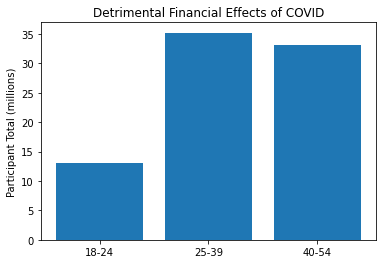

In [17]:
# Plotting the age group data
e_x=e_age_df["Age Groups"]
e_y=e_age_df["Experienced Loss of Income"]/1000000
plt.bar(e_x,e_y)
plt.title('Detrimental Financial Effects of COVID')
plt.ylabel('Participant Total (millions)')
# plt.xlabel('Age Breakdown')
plt.savefig("fin_age.png")

In [18]:
# Creating varaibles for the gender breakdown
e_male=e_df.loc[8][2]
e_female=e_df.loc[9][2]

# Creating a dataframe for the gender breakdown
e_gender_df=pd.DataFrame({"Gender":["Male","Female"],
                 "Experienced Loss of Income":[e_male,e_female]
                })
e_gender_df

,Gender,Experienced Loss of Income
0,Male,57080210
1,Female,61248417


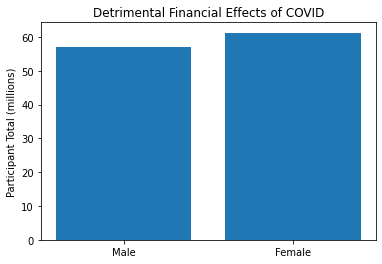

In [19]:
# Plotting the gender breakdown
ge_x=e_gender_df["Gender"]
ge_y=e_gender_df["Experienced Loss of Income"]/1000000
plt.bar(ge_x,ge_y)
plt.title('Detrimental Financial Effects of COVID')
plt.ylabel('Participant Total (millions)')
plt.savefig("fin_gender.png")

In [20]:
# Reading in the excel sheet
spending_path="Resources\spending1_week22.xlsx"
spending_data=pd.read_excel(spending_path)

spending_data

,"Household Spending Table 1. Difficulty Paying Usual Household Expenses in the Last 7 Days, by Select Characteristics: United States",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Source: U.S. Census Bureau Household Pulse Sur...,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: These data are experimental. Users shoul...,NaN,NaN,NaN,NaN,NaN,NaN
2,Total Population 18 Years and Older,NaN,NaN,NaN,NaN,NaN,NaN
3,Select characteristics,Total,Difficulty paying for usual household expenses...,Difficulty paying for usual household expenses...,Difficulty paying for usual household expenses...,Difficulty paying for usual household expenses...,Difficulty paying for usual household expenses...
4,NaN,NaN,Not at all difficult,A little difficult,Somewhat difficult,Very difficult,Did not report
...,...,...,...,...,...,...,...
61,Money saved from deferred or forgiven paym...,9158212,1059216,2477134,2942103,2670675,9084
62,Supplemental Nutrition Assistance Program ...,12652208,896118,2206118,3621789,5910951,17232
63,Did not report,41789671,7828283,6271106,4902002,3775666,19012614
64,* Totals may not sum to 100% as the question a...,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Dropping null values
sp_clean =spending_data.drop([0,1,2,5,7,13,16,22,27,33,41,44,54,64,65])
sp_clean

# Resetting the index
header_row_s=0
sp_clean.columns = sp_clean.iloc[header_row_s]
sp_clean_i= sp_clean.reset_index(drop=True)
sp_clean_i

# Dropping repeated values
s_df=sp_clean_i.drop([0])
s_df

3,Select characteristics,Total,Difficulty paying for usual household expenses during the coronavirus pandemic,Difficulty paying for usual household expenses during the coronavirus pandemic,Difficulty paying for usual household expenses during the coronavirus pandemic,Difficulty paying for usual household expenses during the coronavirus pandemic,Difficulty paying for usual household expenses during the coronavirus pandemic
1,NaN,NaN,Not at all difficult,A little difficult,Somewhat difficult,Very difficult,Did not report
2,Total,249170916,90683463,58348471,44463053,36073885,19602044
3,18 - 24,24737120,5725053,6060982,5038469,3052400,4860216
4,25 - 39,65389093,19922050,15604337,12643590,12269429,4949687
5,40 - 54,62184465,21677834,14114357,11477586,11224325,3690362
6,55 - 64,42895233,16774681,10554253,7288213,5581763,2696323
7,65 and above,53965005,26583845,12014541,8015194,3945968,3405456
8,Male,120531610,46694210,27379071,20159143,16571515,9727671
9,Female,128639306,43989253,30969400,24303910,19502370,9874373
10,Hispanic or Latino (may be of any race),42742343,7993169,10788291,10153478,9335515,4471890


In [22]:
# Creating variables for each age group in order to plot them 
s_ageone=s_df.loc[3][5]
s_agetwo=s_df.loc[4][5]
s_agethree=s_df.loc[5][5]

# Creating a dataframe with age group variables
s_age_df=pd.DataFrame({"Age Groups":["18-24","25-39","40-54"],
                 "Difficulty paying household expenses":[s_ageone,s_agetwo,s_agethree]
                })
s_age_df

,Age Groups,Difficulty paying household expenses
0,18-24,3052400
1,25-39,12269429
2,40-54,11224325


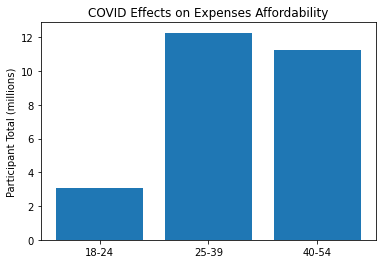

In [23]:
# Plotting the age group data
s_x=s_age_df["Age Groups"]
s_y=s_age_df["Difficulty paying household expenses"]/1000000
plt.bar(s_x,s_y)
plt.title('COVID Effects on Expenses Affordability')
plt.ylabel('Participant Total (millions)')
# plt.xlabel("Participant's Age Group")
plt.savefig("exp_age.png")

In [24]:
# Creating variables for the gender breakdown
s_male=s_df.loc[8][5]
s_female=s_df.loc[9][5]

# Creating a dataframe for the gender breakdown
s_gender_df=pd.DataFrame({"Gender":["Male","Female"],
                 "Difficulty paying household expenses":[s_male,s_female]
                })
s_gender_df

,Gender,Difficulty paying household expenses
0,Male,16571515
1,Female,19502370


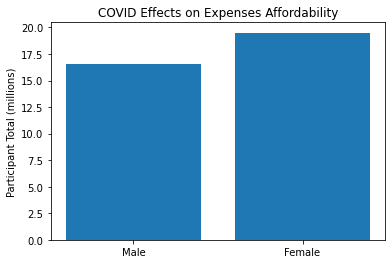

In [25]:
# Plotting the gender breakdown
gs_x=s_gender_df["Gender"]
gs_y=s_gender_df["Difficulty paying household expenses"]/1000000
plt.bar(gs_x,gs_y)
plt.title('COVID Effects on Expenses Affordability')
plt.ylabel('Participant Total (millions)')
plt.savefig("exp_gender.png")